# Visual Analysis on Traffic Violation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
itv = pd.read_csv("Indian_Traffic_Violations.csv")

In [3]:
itv.head()

,Violation_ID,Violation_Type,Fine_Amount,Location,Date,Time,Vehicle_Type,Vehicle_Color,Vehicle_Model_Year,Registration_State,...,Speed_Limit,Recorded_Speed,Alcohol_Level,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required,Previous_Violations,Comments
0,VLT100000,Overloading,4544,Karnataka,2023-01-01,23:02,Car,Red,2012,West Bengal,...,100,95,0.03,Negative,Yes,No,Online,Yes,3,Repeat Offender
1,VLT100001,Driving Without License,2776,Punjab,2023-01-02,00:42,Scooter,Silver,2010,Tamil Nadu,...,40,48,0.45,Negative,Yes,Yes,Online,No,2,Repeat Offender
2,VLT100002,Using Mobile Phone,4785,Maharashtra,2023-01-03,04:32,Scooter,Grey,2006,Tamil Nadu,...,80,26,0.31,Not Conducted,No,No,Not Paid,Yes,4,NaN
3,VLT100003,No Seatbelt,1138,Uttar Pradesh,2023-01-04,15:06,Car,Green,1996,Uttar Pradesh,...,100,115,0.09,Not Conducted,No,Yes,Online,No,5,Repeat Offender
4,VLT100004,Over-speeding,1610,Karnataka,2023-01-05,06:57,Truck,Yellow,2016,Delhi,...,30,115,0.28,Positive,No,Yes,Cash,Yes,0,NaN


In [4]:
itv.shape

(4000, 33)

In [5]:
itv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Violation_ID               4000 non-null   object 
 1   Violation_Type             4000 non-null   object 
 2   Fine_Amount                4000 non-null   int64  
 3   Location                   4000 non-null   object 
 4   Date                       4000 non-null   object 
 5   Time                       4000 non-null   object 
 6   Vehicle_Type               4000 non-null   object 
 7   Vehicle_Color              4000 non-null   object 
 8   Vehicle_Model_Year         4000 non-null   int64  
 9   Registration_State         4000 non-null   object 
 10  Driver_Age                 4000 non-null   int64  
 11  Driver_Gender              4000 non-null   object 
 12  License_Type               4000 non-null   object 
 13  Penalty_Points             4000 non-null   int64

In [6]:
itv.isnull().sum()

Violation_ID                    0
Violation_Type                  0
Fine_Amount                     0
Location                        0
Date                            0
Time                            0
Vehicle_Type                    0
Vehicle_Color                   0
Vehicle_Model_Year              0
Registration_State              0
Driver_Age                      0
Driver_Gender                   0
License_Type                    0
Penalty_Points                  0
Weather_Condition               0
Road_Condition                  0
Officer_ID                      0
Issuing_Agency                  0
License_Validity                0
Number_of_Passengers            0
Helmet_Worn                  1349
Seatbelt_Worn                1292
Traffic_Light_Status            0
Speed_Limit                     0
Recorded_Speed                  0
Alcohol_Level                   0
Breathalyzer_Result             0
Towed                           0
Fine_Paid                       0
Payment_Method

In [7]:
itv.duplicated().sum()


0

In [8]:
itv.describe()


,Fine_Amount,Vehicle_Model_Year,Driver_Age,Penalty_Points,Number_of_Passengers,Speed_Limit,Recorded_Speed,Alcohol_Level,Previous_Violations
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2529.821250,2008.910500,46.658000,4.960500,3.00050,59.817500,69.479000,0.251408,2.47750
std,1417.415712,8.333208,16.865858,3.157441,1.41085,23.633267,29.394652,0.143744,1.71398
min,100.000000,1995.000000,18.000000,0.000000,1.00000,30.000000,20.000000,0.000000,0.00000
25%,1280.750000,2002.000000,32.000000,2.000000,2.00000,40.000000,43.000000,0.130000,1.00000
50%,2506.000000,2009.000000,47.000000,5.000000,3.00000,60.000000,70.000000,0.250000,2.00000
75%,3733.000000,2016.000000,61.000000,8.000000,4.00000,80.000000,95.000000,0.380000,4.00000
max,5000.000000,2023.000000,75.000000,10.000000,5.00000,100.000000,120.000000,0.500000,5.00000


In [9]:
# Convert time column to datetime if available
if 'Time' in itv.columns:
    itv['Time'] = pd.to_datetime(itv['Time'], errors='coerce')
    itv['Hour'] = itv['Time'].dt.hour

# Check for nulls
itv.isnull().sum()

Violation_ID                    0
Violation_Type                  0
Fine_Amount                     0
Location                        0
Date                            0
Time                            0
Vehicle_Type                    0
Vehicle_Color                   0
Vehicle_Model_Year              0
Registration_State              0
Driver_Age                      0
Driver_Gender                   0
License_Type                    0
Penalty_Points                  0
Weather_Condition               0
Road_Condition                  0
Officer_ID                      0
Issuing_Agency                  0
License_Validity                0
Number_of_Passengers            0
Helmet_Worn                  1349
Seatbelt_Worn                1292
Traffic_Light_Status            0
Speed_Limit                     0
Recorded_Speed                  0
Alcohol_Level                   0
Breathalyzer_Result             0
Towed                           0
Fine_Paid                       0
Payment_Method

# Top 10 Locations with Most Violations

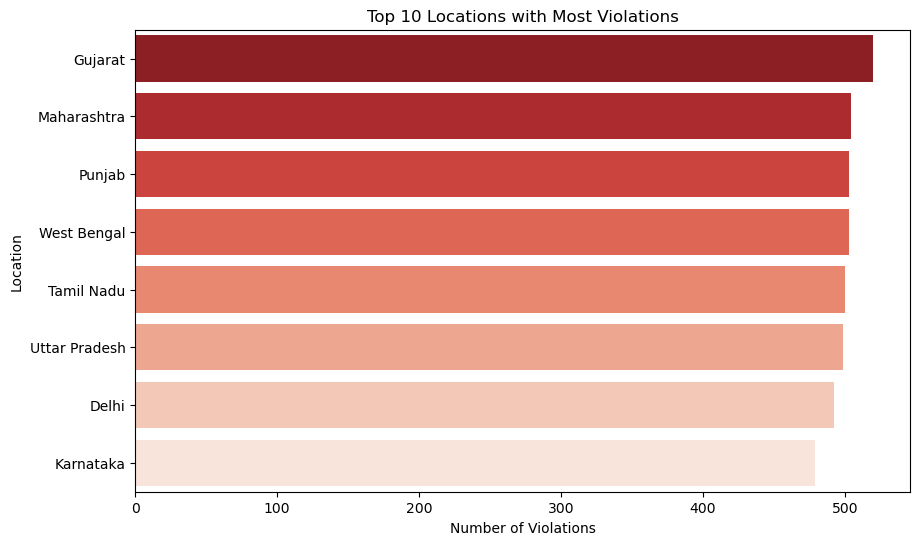

In [10]:
if 'Location' in itv.columns:
    location_violations = itv['Location'].value_counts().nlargest(10)

    plt.figure(figsize=(10,6))
    sns.barplot(x=location_violations.values, y=location_violations.index, palette='Reds_r')
    plt.title("Top 10 Locations with Most Violations")
    plt.xlabel("Number of Violations")
    plt.ylabel("Location")
    plt.show()

# Top 10 Types of Violations

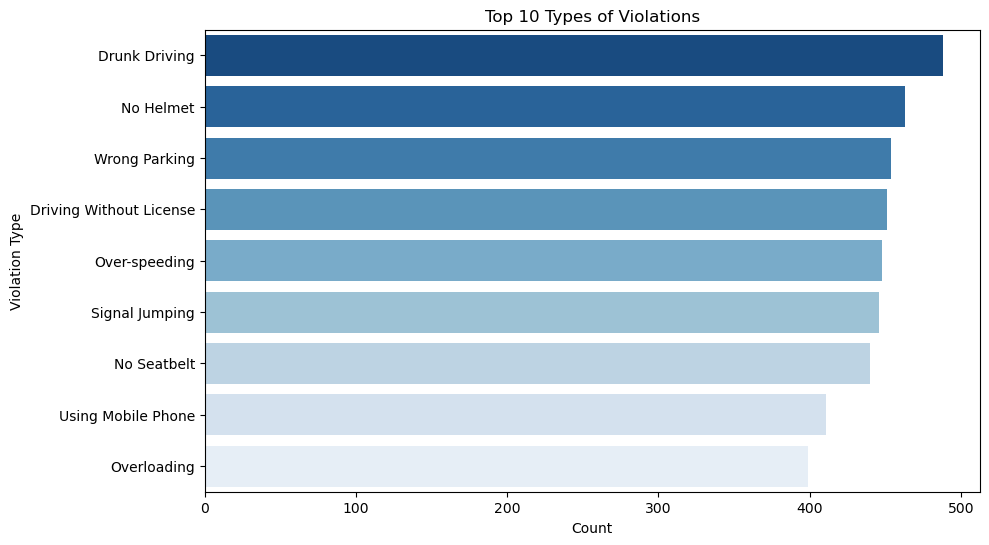

In [11]:
if 'Violation_Type' in itv.columns:
    type_violations = itv['Violation_Type'].value_counts().nlargest(10)

    plt.figure(figsize=(10,6))
    sns.barplot(x=type_violations.values, y=type_violations.index, palette='Blues_r')
    plt.title("Top 10 Types of Violations")
    plt.xlabel("Count")
    plt.ylabel("Violation Type")
    plt.show()

# Violations by Hour of Day

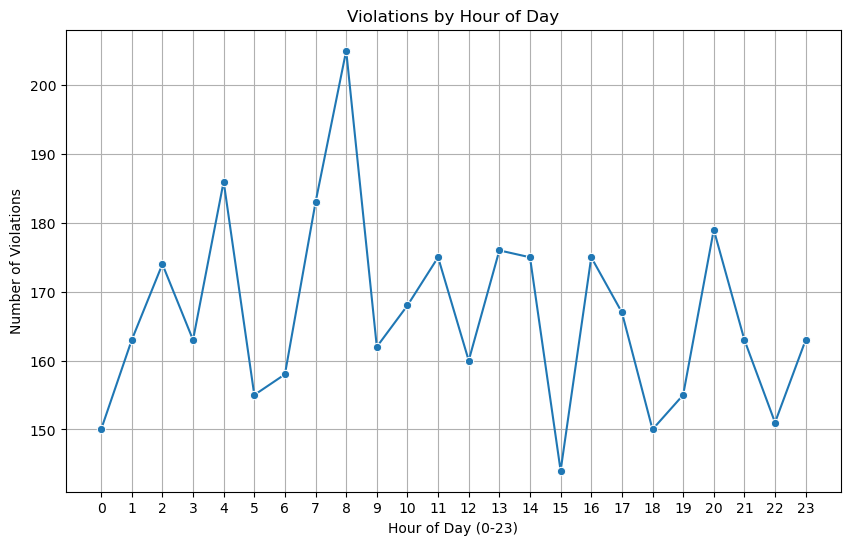

In [12]:
if 'Hour' in itv.columns:
    hourly = itv['Hour'].value_counts().sort_index()

    plt.figure(figsize=(10,6))
    sns.lineplot(x=hourly.index, y=hourly.values, marker='o')
    plt.title("Violations by Hour of Day")
    plt.xlabel("Hour of Day (0-23)")
    plt.ylabel("Number of Violations")
    plt.xticks(range(0,24))
    plt.grid(True)
    plt.show()

In [17]:
print("🔍 Summary of Key Insights:\n")

if 'Location' in itv.columns:
    print("Top Violation Location:", itv['Location'].value_counts().idxmax())

if 'Violation_Type' in itv.columns:
    print("Most Common Violation Type:", itv['Violation_Type'].value_counts().idxmax())

if 'Hour' in itv.columns:
    print("Peak Violation Hour:", itv['Hour'].value_counts().idxmax())

🔍 Summary of Key Insights:

Top Violation Location: Gujarat
Most Common Violation Type: Drunk Driving
Peak Violation Hour: 8
